In [1]:
import os
import sys
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append("../src")
from utils import read_h5file

In [74]:
files = [os.path.join("../data/raw", f) for f in os.listdir("../data/raw")]
dfs = [read_h5file(f) for f in files]

ItemsViewHDF5(<HDF5 group "/CAN" (115 members)>)
ItemsViewHDF5(<HDF5 group "/CAN" (115 members)>)
ItemsViewHDF5(<HDF5 group "/CAN" (115 members)>)
ItemsViewHDF5(<HDF5 group "/CAN" (115 members)>)
ItemsViewHDF5(<HDF5 group "/CAN" (115 members)>)


In [75]:
columns = [
    "AccPedal", "AirIntakeTemperature", "AmbientTemperature",
    "BoostPressure", "ENG_Trq_DMD", "ENG_Trq_ZWR", "ENG_Trq_m_ex", "EngineSpeed_CAN",
    "EngineTemperature", "VehicleSpeed", "OilTemperature1"
]

In [76]:
dfs = [df[columns] for df in dfs]

In [77]:
def generate_sequences(dfs, seq_len):
    dataset = []
    for df in dfs:
        df = df.to_numpy()
        for i in range(len(df) - seq_len + 1):
            seq = df[i:i+seq_len]
            dataset.append(seq)
    return dataset

<AxesSubplot:>

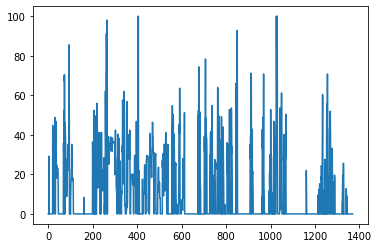

In [78]:
dfs[3]["AccPedal"].plot()

In [108]:
dataset = generate_sequences(dfs, 256)

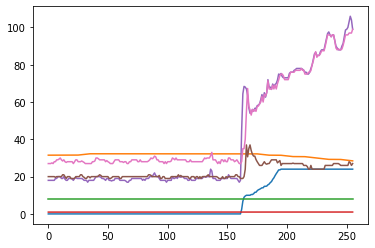

In [119]:
plt.plot(dataset[0][:, 0])
plt.plot(dataset[0][:, 1])
plt.plot(dataset[0][:, 2])
plt.plot(dataset[0][:, 3])
plt.plot(dataset[0][:, 4])
plt.plot(dataset[0][:, 5])
plt.plot(dataset[0][:, 6])



In [120]:
from sklearn.model_selection import train_test_split

In [128]:
train, test = train_test_split(dataset, train_size=.7)

In [131]:
len(test)

91862

In [132]:
train = np.array(train)
test = np.array(test)

In [134]:
train.shape

(214343, 256, 11)

In [137]:
mean = train.mean(axis=(0, 1))

In [138]:
std = train.std(axis=(0, 1))

In [139]:
train = (train-mean)/std
test = (test-mean)/std

In [ ]:
np.save("train_sequence.npy", train)
np.save("test_sequence.npy", test)
